# importing packages and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import datasets: train, test, weather, spray
#train dataset contains most info on the data collected in Chicago
train = pd.read_csv('../Springboard/Capstone Project2/train.csv')

In [3]:
test =pd.read_csv('../Springboard/Capstone Project2/test.csv')

#two data collection spots for weather in weather dataset
weather = pd.read_csv('../Springboard/Capstone Project2/weather.csv')

#Chicago sprays for mosquitos 
spray=pd.read_csv('../Springboard/Capstone Project2/spray.csv')

# Train Data Cleaning

In [4]:
print(train.head(n=10))
print(train.dtypes)

         Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
5  2007-05-29   1500 West Webster Avenue, Chicago, IL 60614, USA   
6  2007-05-29     2500 West Grand Avenue, Chicago, IL 60654, USA   
7  2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
8  2007-05-29        1100 Roosevelt Road, Chicago, IL 60608, USA   
9  2007-05-29   1100 West Chicago Avenue, Chicago, IL 60642, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIEN

In [5]:
print(train.isna().sum())

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64


In [6]:
#changing date to a datetime object
train['Date']=pd.to_datetime(train['Date'])
print(train.dtypes)
print(train.head())

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object
        Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2 2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4 2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41

In [24]:
#keeping one address column and dropping the rest
train= train.drop(columns=['Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy'])
train.columns

Index(['Date', 'Address', 'Species', 'Trap', 'Latitude', 'Longitude',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

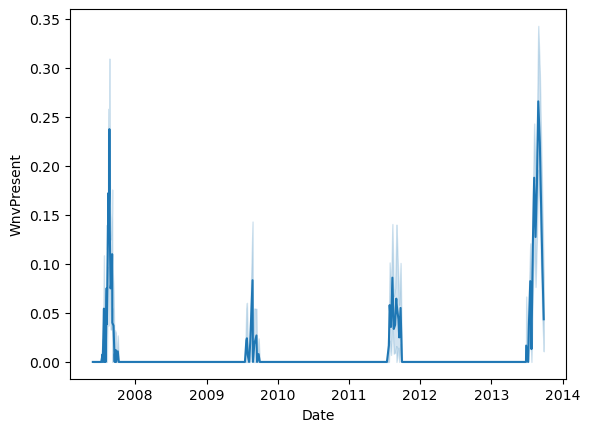

In [27]:
#plot first time vs WnvPresent
sns.lineplot(x='Date', y='WnvPresent', data=train)
plt.show()

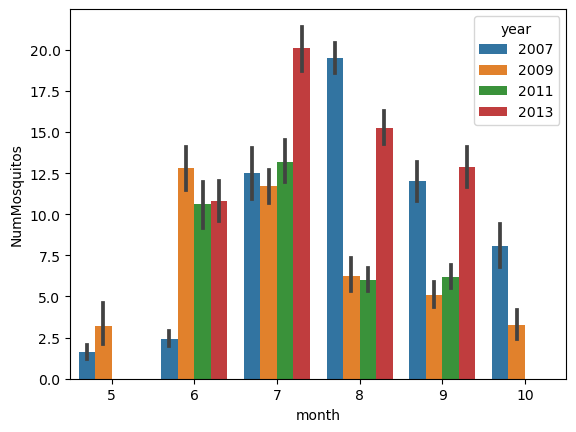

In [73]:
#extract day, month, year from datetime column 'Date'
train['day']= train['Date'].dt.day
train['month']= train['Date'].dt.month
train['year']= train['Date'].dt.year

#plot month over time with Num of mosquitoes and hue ='year' - need to see the the trend better than plot before
sns.barplot(x='month', y='NumMosquitos', hue='year', data=train)
#sns.lineplot(x='month', y='NumMosquitos', hue='year', data=train)

plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_51381/22425661.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




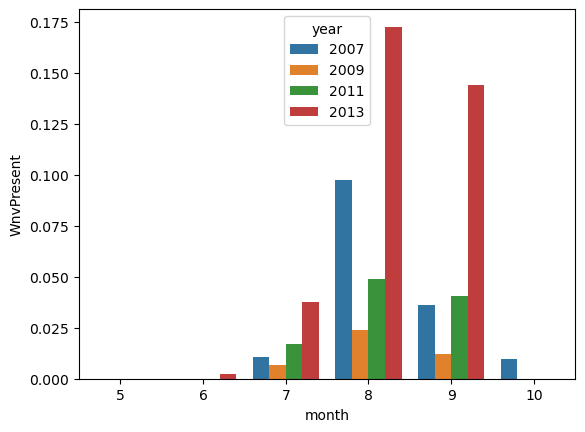

In [68]:
#plot month over time with Wnv Present and hue ='year' 
sns.barplot(x='month', y='WnvPresent', hue='year', data=train, ci=None)
plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_51381/3549375053.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_51381/3549375053.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




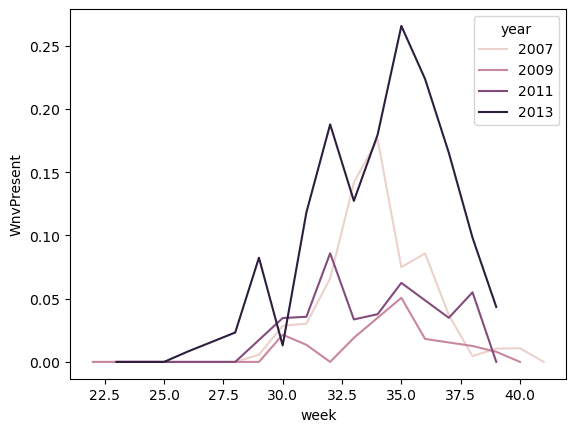

In [75]:
train['week']=train['Date'].dt.week
sns.lineplot(x='week', y='WnvPresent', hue='year', data=train, ci=None)
plt.show()

6
['CULEX PIPIENS/RESTUANS' 'CULEX RESTUANS' 'CULEX PIPIENS'
 'CULEX SALINARIUS' 'CULEX TERRITANS' 'CULEX TARSALIS' 'CULEX ERRATICUS']
CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64


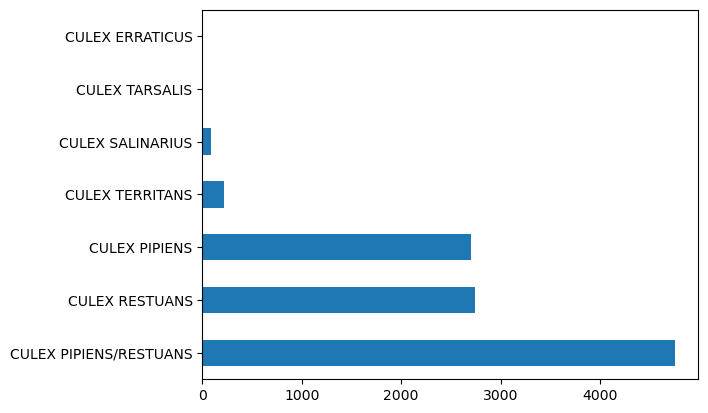

Species
CULEX ERRATICUS             0
CULEX PIPIENS             240
CULEX PIPIENS/RESTUANS    262
CULEX RESTUANS             49
CULEX SALINARIUS            0
CULEX TARSALIS              0
CULEX TERRITANS             0
Name: WnvPresent, dtype: int64


In [76]:
#determine what, how many and number of each species of mosquitoes 
print(train.month.nunique())
print(train.Species.unique())
print(train.Species.value_counts())

train.Species.value_counts().plot(kind='barh')
plt.show()

Species
CULEX ERRATICUS           0.000000
CULEX PIPIENS             0.088922
CULEX PIPIENS/RESTUANS    0.055135
CULEX RESTUANS            0.017883
CULEX SALINARIUS          0.000000
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.000000
Name: WnvPresent, dtype: float64


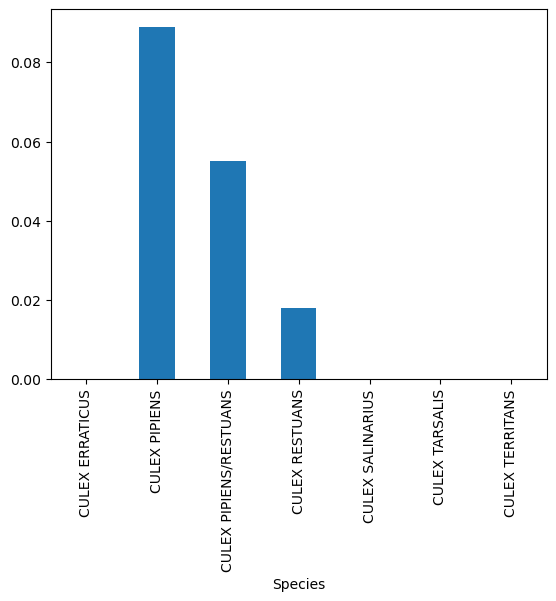

In [79]:
#look into what species seems to carry the virus
print(train.groupby('Species')['WnvPresent'].mean())

train.groupby('Species')['WnvPresent'].mean().plot(kind='bar')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd


fig = px.scatter_geo(train, lat='Latitude', lon='Longitude')
fig.update_layout(title = 'WNvPresent', title_x=0.5)
fig.show()

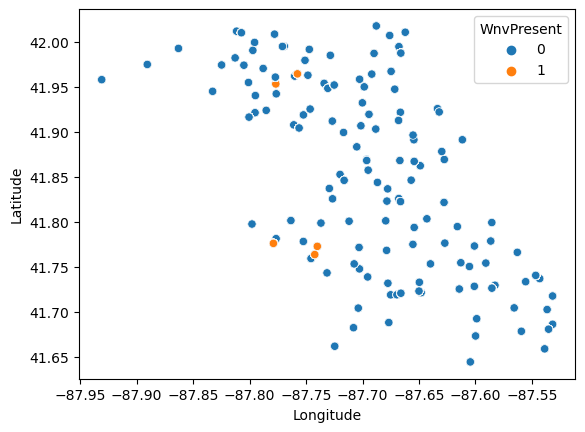

In [58]:
sns.scatterplot(x='Longitude', y='Latitude', data=train, hue='WnvPresent')
plt.show()

[0 1]
0    9955
1     551
Name: WnvPresent, dtype: int64


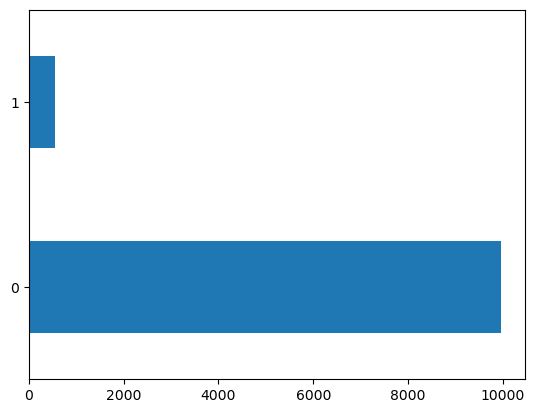

In [59]:
print(train.WnvPresent.unique())
print(train.WnvPresent.value_counts())

train.WnvPresent.value_counts().plot(kind='barh')
plt.show()

              Latitude  Longitude  NumMosquitos  WnvPresent      year  \
Latitude      1.000000  -0.701795     -0.184806    0.028697  0.163832   
Longitude    -0.701795   1.000000      0.036633   -0.060345 -0.188830   
NumMosquitos -0.184806   0.036633      1.000000    0.196820 -0.029611   
WnvPresent    0.028697  -0.060345      0.196820    1.000000  0.050865   
year          0.163832  -0.188830     -0.029611    0.050865  1.000000   
month        -0.085219   0.097004     -0.026040    0.100143 -0.164287   
day           0.038678  -0.049094      0.020451    0.008245  0.127248   

                 month       day  
Latitude     -0.085219  0.038678  
Longitude     0.097004 -0.049094  
NumMosquitos -0.026040  0.020451  
WnvPresent    0.100143  0.008245  
year         -0.164287  0.127248  
month         1.000000 -0.252047  
day          -0.252047  1.000000  


/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_51381/528146980.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_51381/528146980.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



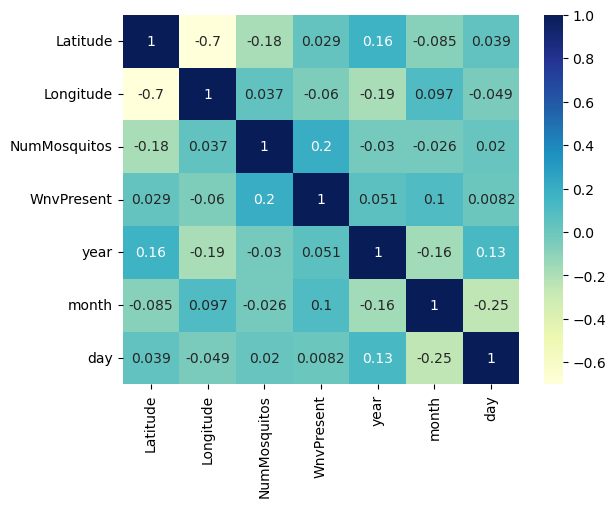

In [60]:
#heatmap to show correlation in the trainset data
print(train.corr())
  
#plot correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
  
#show heatmap
plt.show()

In [ ]:
#one hot encoding for Species as potentially species could help depict WNvirus

??

# Weather Data Cleaning

In [7]:
#determine how many NAN values, types of categories
print(weather.isna().sum())
print(weather.head())
print(weather.dtypes)

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64
   Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82  

In [8]:
#change date column to_datetime object
weather['Date']=pd.to_datetime(weather['Date'])
weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
Depart                 object
DewPoint                int64
WetBulb                object
Heat                   object
Cool                   object
Sunrise                object
Sunset                 object
CodeSum                object
Depth                  object
Water1                 object
SnowFall               object
PrecipTotal            object
StnPressure            object
SeaLevel               object
ResultSpeed           float64
ResultDir               int64
AvgSpeed               object
dtype: object

In [9]:
#weather - replace missing info ('M') with NaN
weather.replace('M', np.nan, inplace=True)
weather.isna().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise           0
Sunset            0
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [10]:
#drop columns - Depart, Depth, Water1, SnowFall due to missing information (about half or all missing data on these columns)
weather = weather.drop(columns=['Depart', 'Depth', 'Water1', 'SnowFall'])

In [11]:
#drop columns - Heat, Cool, Sunrise, Sunset as focusing on other features as from literature can read about how temperature, 
#wind potentially can affect West Nile Virus
weather = weather.drop(columns=['Heat', 'Cool', 'Sunrise', 'Sunset'])

In [12]:
#determine how many NaN values in each column
print(weather.dtypes)
print(weather.isna().sum())

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
DewPoint                int64
WetBulb                object
CodeSum                object
PrecipTotal            object
StnPressure            object
SeaLevel               object
ResultSpeed           float64
ResultDir               int64
AvgSpeed               object
dtype: object
Station         0
Date            0
Tmax            0
Tmin            0
Tavg           11
DewPoint        0
WetBulb         4
CodeSum         0
PrecipTotal     2
StnPressure     4
SeaLevel        9
ResultSpeed     0
ResultDir       0
AvgSpeed        3
dtype: int64


In [14]:
#Replace the Tavg Nan values with taking the average of (Tmax + Tmin)
weather['Tavg']=weather['Tavg'].fillna(value=((weather['Tmax']+ weather['Tmin'])/2))
weather.isna().sum()
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,47,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,42,47,BR HZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,40,48,,0.00,29.39,30.12,11.7,7,11.9


In [22]:
#replace Wetbulb, PrecipTotal, StnPressure, SeaLevel, AvgSpeed NaN values
weather[['WetBulb', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed']]= weather[['WetBulb', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed']].fillna(method='ffill')


#replace T with 0 as stands for trace amounts
weather.replace('  T', 0, inplace=True)

In [23]:
#changing column type object to numeric - int or float 
weather[['Tavg', 'WetBulb']]=weather[['Tavg', 'WetBulb']].astype('int')
weather[['PrecipTotal', 'StnPressure','SeaLevel', 'AvgSpeed']]= weather[['PrecipTotal', 'StnPressure','SeaLevel', 'AvgSpeed']].astype('float')

weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                    int64
DewPoint                int64
WetBulb                 int64
CodeSum                object
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
dtype: object

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_51381/927368478.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='Tavg', hue='year', data=weather, ci=None)


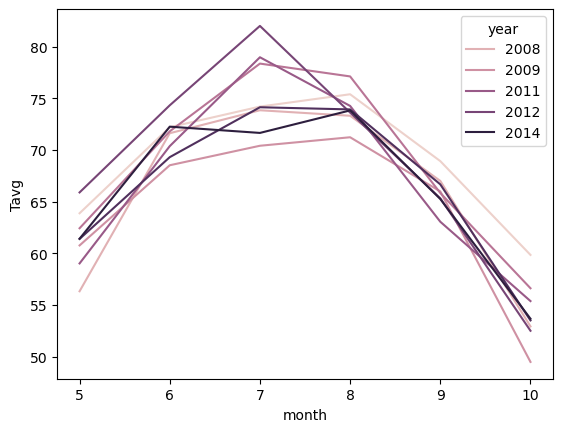

In [39]:
weather['year'] = weather['Date'].dt.year
weather['month'] = weather['Date'].dt.month
weather['day'] = weather['Date'].dt.day

sns.lineplot(x='month', y='Tavg', hue='year', data=weather, ci=None)
plt.show()

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_51381/1869969597.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='Tavg', hue='year', data=weather, ax=ax[0], ci=None)
/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_51381/1869969597.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='WnvPresent', hue='year', data=train, ax=ax[1], ci=None)


<Figure size 640x480 with 0 Axes>

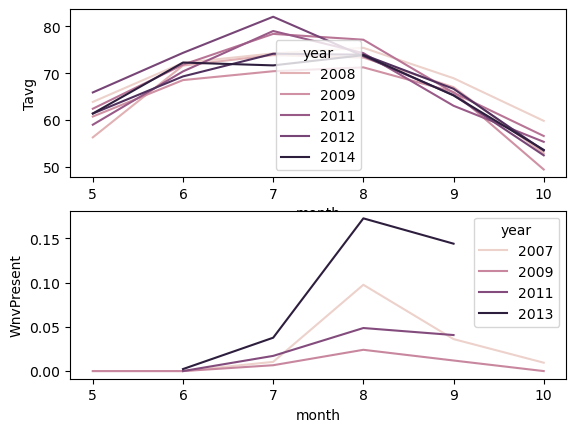

In [45]:
plt.figure()
f, ax = plt.subplots(2)

sns.lineplot(x='month', y='Tavg', hue='year', data=weather, ax=ax[0], ci=None)

sns.lineplot(x='month', y='WnvPresent', hue='year', data=train, ax=ax[1], ci=None)
plt.show()



# Spray Data Cleaning

In [46]:
print(spray.isna().sum())
print(len(spray))
print(spray.head())
spray['Date']=pd.to_datetime(spray['Date'])
spray['year']=spray['Date'].dt.year
spray['month']=spray['Date'].dt.month
spray['day']=spray['Date'].dt.day
spray.dtypes

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64
14835
         Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858


Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
year                  int64
month                 int64
day                   int64
dtype: object

In [47]:
spray.drop(columns='Time')

,Date,Latitude,Longitude,year,month,day
0,2011-08-29,42.391623,-88.089163,2011,8,29
1,2011-08-29,42.391348,-88.089163,2011,8,29
2,2011-08-29,42.391022,-88.089157,2011,8,29
3,2011-08-29,42.390637,-88.089158,2011,8,29
4,2011-08-29,42.390410,-88.088858,2011,8,29
...,...,...,...,...,...,...
14830,2013-09-05,42.006587,-87.812355,2013,9,5
14831,2013-09-05,42.006192,-87.816015,2013,9,5
14832,2013-09-05,42.006022,-87.817392,2013,9,5
14833,2013-09-05,42.005453,-87.817423,2013,9,5


In [48]:
spray.month.unique()


array([8, 9, 7])

In [49]:
spray.year.unique()

array([2011, 2013])

Since there are only two years that correspond to the training dataset years, do we:
1. do some sort of statistical test to see if significantly different than the years prior when spraying wasn't done
2. not do anything with it as it is only two years?